<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/feature_engineering/feature_engineering_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import drive
drive.mount('/content/gdrive')
!mkdir -p ~/.kaggle
!cp /content/gdrive/My\ Drive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d wendykan/lending-club-loan-data
!ls -l /content
!unzip -o /content/lending-club-loan-data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
 99% 711M/720M [00:11<00:00, 74.0MB/s]
100% 720M/720M [00:11<00:00, 64.1MB/s]
total 737564
drwx------ 4 root root      4096 Jan 31 02:50 gdrive
-rw-r--r-- 1 root root 755251835 Jan 31 02:51 lending-club-loan-data.zip
drwxr-xr-x 1 root root      4096 Jan 13 16:38 sample_data
Archive:  /content/lending-club-loan-data.zip
  inflating: LCDataDictionary.xlsx   
  inflating: database.sqlite         
  inflating: loan.csv                


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import check_random_state

train_path = '/content/loan.csv'
rs = check_random_state(44)

In [0]:
use_cols = [
  'loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status', 
  'open_il_12m'
]
data = pd.read_csv(train_path, usecols=use_cols).sample(
  250000, random_state = rs
)

In [21]:
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
705202,19200,7.89,108500.0,Fully Paid,18.0,2.0
1817316,4375,14.09,50000.0,Fully Paid,10.0,NaN
926782,9000,14.49,73500.0,Charged Off,23.0,3.0
2161593,18150,26.30,50000.0,Charged Off,8.0,0.0
956052,11950,14.48,28500.0,Fully Paid,3.0,NaN


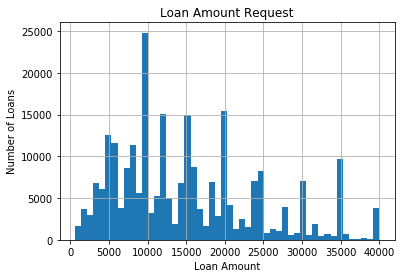

In [22]:
data.loan_amnt.hist(bins=50)
plt.title('Loan Amount Request')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans');

In [23]:
data.int_rate.unique()

array([ 7.89, 14.09, 14.49, 26.3 , 14.48, 18.85,  6.49, 15.05, 16.99,
       12.73, 18.99, 17.57, 10.49, 11.67, 12.79,  6.11, 19.72, 13.56,
       18.55,  7.35, 11.05, 15.99, 13.49, 22.45, 19.92, 15.8 , 11.55,
       12.49, 12.69, 15.59,  6.71, 23.88, 13.99,  6.46, 11.49, 18.24,
       26.77,  7.9 , 16.02, 10.99,  6.99,  5.32, 20.8 , 16.91, 11.99,
       10.91, 14.16, 21.67, 10.41, 12.99, 15.49,  6.24, 20.89, 16.29,
        7.21,  8.9 , 15.31, 23.83,  8.18, 10.33, 18.25, 13.06,  6.03,
       13.59, 12.59, 12.62, 14.08, 14.65,  5.31,  6.68, 17.09, 13.35,
       12.29,  9.99,  7.34,  6.92, 11.53,  7.39,  9.17, 22.35, 15.77,
        9.91,  9.44, 17.27,  7.99, 14.33, 15.04, 24.85,  7.84, 10.64,
       11.47, 13.98, 20.  ,  7.97,  7.24,  8.19, 13.72, 18.49, 12.85,
       13.33, 22.15,  8.39,  6.19, 11.39,  8.08, 28.72, 10.42, 17.56,
       26.31, 10.08,  8.99, 18.94, 19.89,  8.59, 19.42, 23.99,  9.49,
        7.59, 11.06, 13.66, 17.86, 14.96, 19.03, 12.88, 13.65, 20.2 ,
       14.99,  7.49,

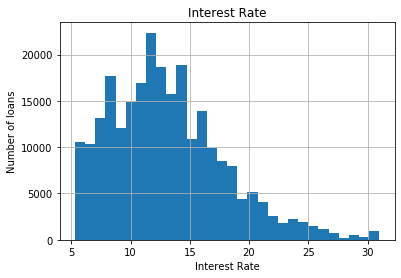

In [24]:
data.int_rate.hist(bins=30)
plt.title('Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Number of loans');


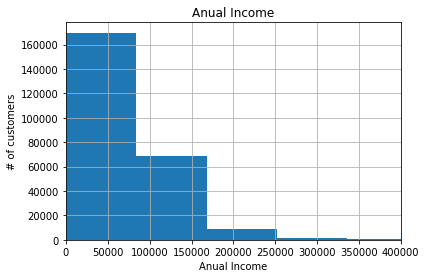

In [25]:
data.annual_inc.hist(bins=100)
plt.xlim(0, 400000)
plt.title('Anual Income')
plt.xlabel('Anual Income')
plt.ylabel('# of customers');

In [26]:
data.open_acc.dropna().unique()

array([18., 10., 23.,  8.,  3., 11., 24., 19., 14.,  6.,  9., 15., 21.,
        5., 12., 20., 13.,  7., 22., 16.,  4., 27., 33., 25.,  1., 36.,
       17., 30., 31.,  2., 26., 29., 28., 35., 34., 32., 39., 38., 42.,
       45., 37., 41., 43., 40.,  0., 57., 55., 46., 48., 47., 53., 44.,
       86., 50., 49., 58., 52., 61., 54., 51., 66., 63., 59., 65., 60.,
       56., 62., 76., 74.])

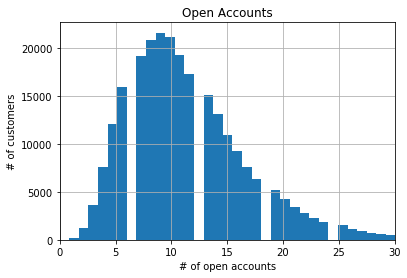

In [27]:
data.open_acc.hist(bins=100)
plt.xlim(0, 30)
plt.title('Open Accounts')
plt.xlabel('# of open accounts')
plt.ylabel('# of customers');

In [28]:
data.open_il_12m.unique()

array([ 2., nan,  3.,  0.,  1.,  4.,  5.,  6.,  7.,  9.,  8., 15., 10.,
       12., 11., 13., 20.])

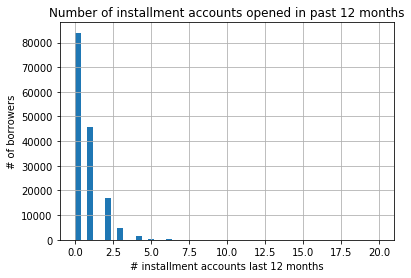

In [29]:
data.open_il_12m.hist(bins=50)
plt.title('Number of installment accounts opened in past 12 months')
plt.xlabel('# installment accounts last 12 months')
plt.ylabel('# of borrowers');

In [30]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Default'],
      dtype=object)

In [31]:
data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)
data.defaulted.mean()

8e-06

In [32]:
data['defaulted'].value_counts()

0    249998
1         2
Name: defaulted, dtype: int64

In [33]:
data.loan_status.isin(['Default'])

705202     False
1817316    False
926782     False
2161593    False
956052     False
           ...  
351397     False
1924625    False
971500     False
743403     False
1477751    False
Name: loan_status, Length: 250000, dtype: bool

In [34]:
data.loan_status.value_counts()

Fully Paid                                             115493
Current                                                101535
Charged Off                                             28874
Late (31-120 days)                                       2402
In Grace Period                                           942
Late (16-30 days)                                         424
Does not meet the credit policy. Status:Fully Paid        249
Does not meet the credit policy. Status:Charged Off        79
Default                                                     2
Name: loan_status, dtype: int64